In [107]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [48]:
flood_df = pd.read_csv('../Train.csv')

In [59]:
train_df = flood_df[flood_df.columns.drop(list(flood_df.filter(regex='2019')))]
test_df = flood_df[flood_df.columns.drop(list(flood_df.filter(regex='2014|2015')))]

In [64]:
precip_train_cols = [x for x in train_df.columns if x.startswith('precip')]

In [61]:
precip_df = train_df.copy()
precip_df = precip_df.set_index('Square_ID')

In [65]:
precip_ts = pd.DataFrame(precip_df[precip_train_cols].stack(0), columns=['precip_value']).reset_index([1])

In [94]:
precip_ts['week'] = pd.to_datetime(precip_ts['level_1'].apply(lambda x: x.split(" ")[1]))

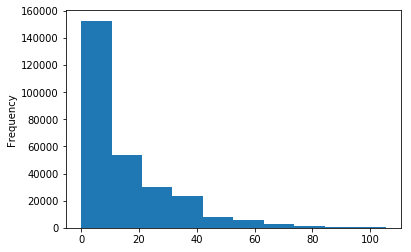

In [120]:
precip_ts.precip_value.plot(kind='hist')

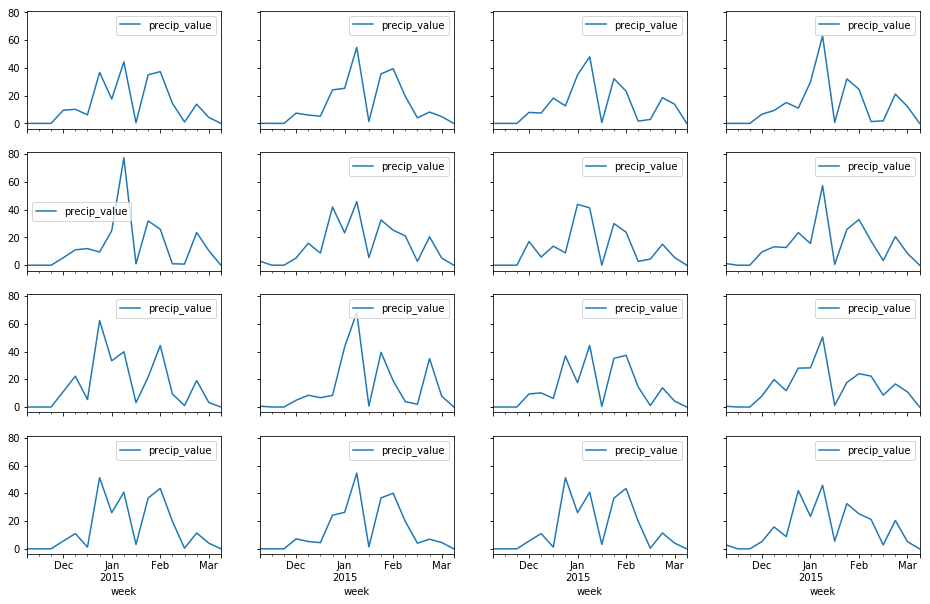

In [119]:
f, axes = plt.subplots(figsize=(16, 10), nrows=4, ncols=4, sharex=True, sharey=True)
ax_square = zip(axes.flatten(), train_df['Square_ID'].sample(16))

for ax, square_id in ax_square:
    precip_ts.loc[square_id].plot(x='week', y='precip_value', ax=ax)